In [1]:

import matplotlib.pyplot as plt
import numpy as np
import scipy
import matplotlib.image as mpimg
from scipy.interpolate import griddata
from scipy.optimize import minimize

img_t01=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t01.npy')
img_t01_seg=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t01_seg.npy')
img_t02=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t02.npy')
img_t02_seg=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t02_seg.npy')
img_t03=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t03.npy')
img_t03_seg=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t03_seg.npy')
img_t04=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t04.npy')
img_t04_seg=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t04_seg.npy')
img_t05=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t05.npy')
img_t05_seg=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t05_seg.npy')
img_t06=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t06.npy')
img_t06_seg=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\training_fig\img_t06_seg.npy')

img_v07=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\validation_fig\img_v07.npy')
img_v07_seg=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\validation_fig\img_v07_seg.npy')
img_v15=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\validation_fig\img_v15.npy')
img_v15_seg=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\validation_fig\img_v15_seg.npy')

In [3]:
#1.1 
T0=np.array([1,1,0,0,0])#T=np.array([sx, thetax,sy,thetay, tx,ty])



def transform(img_m,T,img_f_size):
    xmax=img_m.shape[0]
    ymax=img_m.shape[1]

    x0=np.linspace(-(xmax/2) +1,xmax/2,xmax)   #x,y[-127,128]
    y0=np.linspace(-(ymax/2) +1,ymax/2,ymax)
    x,y=np.meshgrid(x0,y0)
    x_t=np.zeros([xmax,ymax])
    y_t=np.zeros([xmax,ymax])
    
    Trans=([T[0]*np.cos(T[2]),-T[0]*np.sin(T[2]),T[3]],[T[1]*np.sin(T[2]),T[1]*np.cos(T[2]),T[4]],[0,0,1])
    for i in range(xmax):
        for j in range(ymax):
          
            index=np.array([x[i,j],y[i,j],1])
            T_index=np.dot(Trans,index)
            T_index=np.array(T_index)
            x_t[i,j]=T_index[0]
            y_t[i,j]=T_index[1]
   
    
    x0f=np.linspace(-(img_f_size[0]/2)+1,img_f_size[0]/2,img_f_size[0])  #x,y[-127,128]
    y0f=np.linspace(-(img_f_size[1]/2)+1,img_f_size[1]/2,img_f_size[1])
    xf,yf=np.meshgrid(x0f,y0f)
    
    img_moved = griddata((x_t.flatten(),y_t.flatten()), img_m.flatten(), (xf, yf), method='linear',fill_value=0)#resample

    return img_moved

#1.2
def lossFunction(T,img_m,img_f):
    img_moved=transform(img_m,T,img_f.shape)
    #L=np.sum(math.pow(img_f[:,:] -img_moved[:,:],2))
    L=0
    for i in range(img_f.shape[0]):
        for j in range(img_f.shape[1]):
            L+=(img_f[i,j] -img_moved[i,j])**2

    return L


#2
# res_t01v07 = minimize(lossFunction, T0,args=(img_t01,img_v07),method='Nelder-Mead',options={'maxiter': 50})
# #res1 = minimize(lossFunction, T,args=(img1,img3),method='Nelder-Mead',options={'maxiter': 100})
# print(res_t01v07)
# Topt_t01v07=res_t01v07.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt2_t01v07.npy',Topt_t01v07)
# img_moved_t01v07=transform(img_t01,Topt_t01v07,img_v07.shape)
# fig = plt.figure()
# plt.imshow(img_t01)
# plt.title('training01')
# fig = plt.figure()
# plt.imshow(img_v07) 
# plt.title('validation07')
# fig = plt.figure()
# plt.imshow(img_moved_t01v07)
# plt.title('training01 moved ')



# res_t02v07 = minimize(lossFunction, T0,args=(img_t02,img_v07),method='Powell',options={'maxiter': 50})
# Topt_t02v07=res_t02v07.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t02v07.npy',Topt_t02v07)
# res_t03v07 = minimize(lossFunction, T0,args=(img_t03,img_v07),method='Powell',options={'maxiter': 50})
# Topt_t03v07=res_t03v07.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t03v07.npy',Topt_t03v07)
# res_t04v07 = minimize(lossFunction, T0,args=(img_t04,img_v07),method='Powell',options={'maxiter': 50})
# Topt_t04v07=res_t04v07.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t04v07.npy',Topt_t04v07)
# res_t05v07 = minimize(lossFunction, T0,args=(img_t05,img_v07),method='Powell',options={'maxiter': 50})
# Topt_t05v07=res_t05v07.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t05v07.npy',Topt_t05v07)
# res_t06v07 = minimize(lossFunction, T0,args=(img_t06,img_v07),method='Powell',options={'maxiter': 50})
# Topt_t06v07=res_t06v07.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t06v07.npy',Topt_t06v07)

# res_t01v15 = minimize(lossFunction, T0,args=(img_t01,img_v15),method='Powell',options={'maxiter': 50})
# Topt_t01v15=res_t01v15.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t01v15.npy',Topt_t01v15)
# res_t02v15 = minimize(lossFunction, T0,args=(img_t02,img_v15),method='Powell',options={'maxiter': 50})
# Topt_t02v15=res_t02v15.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t02v15.npy',Topt_t02v15)
# res_t03v15 = minimize(lossFunction, T0,args=(img_t03,img_v15),method='Powell',options={'maxiter': 50})
# Topt_t03v15=res_t03v15.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t03v15.npy',Topt_t03v15)
# res_t04v15 = minimize(lossFunction, T0,args=(img_t04,img_v15),method='Powell',options={'maxiter': 50})
# Topt_t04v15=res_t04v15.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t04v15.npy',Topt_t04v15)
# res_t05v15 = minimize(lossFunction, T0,args=(img_t05,img_v15),method='Powell',options={'maxiter': 50})
# Topt_t05v15=res_t05v15.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t05v15.npy',Topt_t05v15)
# res_t06v15 = minimize(lossFunction, T0,args=(img_t06,img_v15),method='Powell',options={'maxiter': 50})
# Topt_t06v15=res_t06v15.x
# np.save(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t06v15.npy',Topt_t06v15)
                    
            
                
                


Text(0.5, 1.0, 'training01 moved ')

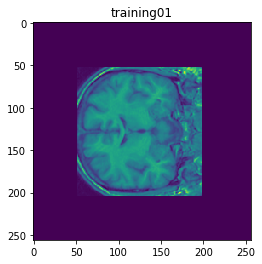

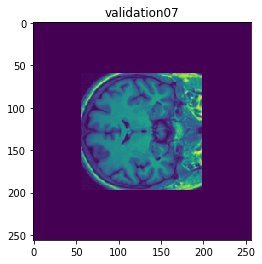

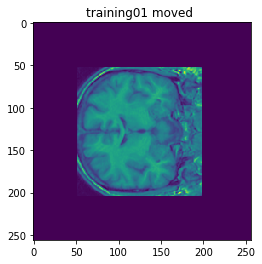

In [4]:
T0=np.array([1,1,0,0,0])#T=np.array([sx, thetax,sy,thetay, tx,ty])



def transform(img_m,T,img_f_size):
    xmax=img_m.shape[0]
    ymax=img_m.shape[1]

    x0=np.linspace(-(xmax/2) +1,xmax/2,xmax)   #x,y[-127,128]
    y0=np.linspace(-(ymax/2) +1,ymax/2,ymax)
    x,y=np.meshgrid(x0,y0)
    x_t=np.zeros([xmax,ymax])
    y_t=np.zeros([xmax,ymax])
    
    Trans=([T[0]*np.cos(T[2]),-T[0]*np.sin(T[2]),T[3]],[T[1]*np.sin(T[2]),T[1]*np.cos(T[2]),T[4]],[0,0,1])
    for i in range(xmax):
        for j in range(ymax):
          
            index=np.array([x[i,j],y[i,j],1])
            T_index=np.dot(Trans,index)
            T_index=np.array(T_index)
            x_t[i,j]=T_index[0]
            y_t[i,j]=T_index[1]
   
    
    x0f=np.linspace(-(img_f_size[0]/2)+1,img_f_size[0]/2,img_f_size[0])  #x,y[-127,128]
    y0f=np.linspace(-(img_f_size[1]/2)+1,img_f_size[1]/2,img_f_size[1])
    xf,yf=np.meshgrid(x0f,y0f)
    
    img_moved = griddata((x_t.flatten(),y_t.flatten()), img_m.flatten(), (xf, yf), method='linear',fill_value=0)#resample

    return img_moved


#1.2
def lossFunction(T,img_m,img_f):
    img_moved=transform(img_m,T,img_f.shape)
    #L=np.sum(math.pow(img_f[:,:] -img_moved[:,:],2))
    L=0
    for i in range(img_f.shape[0]):
        for j in range(img_f.shape[1]):
            L+=(img_f[i,j] -img_moved[i,j])**2

    return L


#2

img_moved_t01v07=transform(img_t01,T0,img_v07.shape)
fig = plt.figure()
plt.imshow(img_t01)
plt.title('training01')
fig = plt.figure()
plt.imshow(img_v07) 
plt.title('validation07')
fig = plt.figure()
plt.imshow(img_moved_t01v07)
plt.title('training01 moved ')

In [5]:
#load T opt 
Topt_t01v07=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t01v07.npy')
Topt_t02v07=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t02v07.npy')
Topt_t03v07=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t03v07.npy')
Topt_t04v07=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t04v07.npy')
Topt_t05v07=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t05v07.npy')
Topt_t06v07=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t06v07.npy')

Topt_t01v15=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t01v15.npy')
Topt_t02v15=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t02v15.npy')
Topt_t03v15=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t03v15.npy')
Topt_t04v15=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t04v15.npy')
Topt_t05v15=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t05v15.npy')
Topt_t06v15=np.load(r'C:\Users\Edwin Kan Group\Documents\Zijing\project\Topt3\Topt_t06v15.npy')
print(Topt_t01v07)
print(Topt_t02v07)
print(Topt_t03v07)
print(Topt_t04v07)
print(Topt_t05v07)
print(Topt_t06v07)
print(Topt_t01v15)
print(Topt_t02v15)
print(Topt_t03v15)
print(Topt_t04v15)
print(Topt_t05v15)
print(Topt_t06v15)


[ 9.42599818e-01  9.06425433e-01 -1.99105451e-04  3.02277835e+00
  2.82775952e-01]
[ 8.78243131e-01  8.86061619e-01 -9.77208174e-04  4.10732991e+00
  2.10430553e-01]
[1.02583353e+00 9.26740006e-01 5.24315114e-04 6.38641399e+00
 1.52165685e-01]
[ 1.02830466e+00  9.40775564e-01 -6.16571121e-04  5.20197497e+00
  1.32648099e-02]
[ 9.45590741e-01  9.38469547e-01 -2.42492429e-04  5.48212347e+00
  5.46278331e-01]
[9.60719102e-01 9.37511341e-01 4.56065607e-03 8.46632367e+00
 3.75086724e-02]
[ 9.65916966e-01  1.06104895e+00 -1.68238737e-10 -3.99694394e+00
  9.28986295e-01]
[ 9.38298581e-01  1.02175055e+00  5.45338393e-10 -2.84254102e+00
  5.69965280e-02]
[ 1.17666660e+00  9.79577848e-01 -2.61543228e-10  4.62694563e+00
  3.19004253e-02]
[1.1909023  1.04822966 0.00336083 2.65791075 1.05699296]
[ 9.66329764e-01  1.07523255e+00 -3.14342170e-10 -3.17308254e+00
  3.84296424e-03]
[1.02221722 1.07866405 0.00135769 0.21293283 0.07156588]


In [6]:
#3

def transform_seg(img_m,T,img_f_size):
    xmax=img_m.shape[0]
    ymax=img_m.shape[1]

    x0=np.linspace(-(xmax/2) +1,xmax/2,xmax)   #x,y[-127,128]
    y0=np.linspace(-(ymax/2) +1,ymax/2,ymax)
    x,y=np.meshgrid(x0,y0)
    x_t=np.zeros([xmax,ymax])
    y_t=np.zeros([xmax,ymax])
    
    Trans=([T[0]*np.cos(T[2]),-T[0]*np.sin(T[2]),T[3]],[T[1]*np.sin(T[2]),T[1]*np.cos(T[2]),T[4]],[0,0,1])
    for i in range(xmax):
        for j in range(ymax):
          
            index=np.array([x[i,j],y[i,j],1])
            T_index=np.dot(Trans,index)
            T_index=np.array(T_index)
            x_t[i,j]=T_index[0]
            y_t[i,j]=T_index[1]
   
    
    x0f=np.linspace(-(img_f_size[0]/2)+1,img_f_size[0]/2,img_f_size[0])  #x,y[-127,128]
    y0f=np.linspace(-(img_f_size[1]/2)+1,img_f_size[1]/2,img_f_size[1])
    xf,yf=np.meshgrid(x0f,y0f)
    
    img_moved = griddata((x_t.flatten(),y_t.flatten()), img_m.flatten(), (xf, yf), method='nearest',fill_value=0)#resample

    return img_moved

img_moved_t01v07_seg=transform_seg(img_t01_seg,Topt_t01v07,img_v07_seg.shape)
img_moved_t02v07_seg=transform_seg(img_t02_seg,Topt_t02v07,img_v07_seg.shape)
img_moved_t03v07_seg=transform_seg(img_t03_seg,Topt_t03v07,img_v07_seg.shape)
img_moved_t04v07_seg=transform_seg(img_t04_seg,Topt_t04v07,img_v07_seg.shape)
img_moved_t05v07_seg=transform_seg(img_t05_seg,Topt_t05v07,img_v07_seg.shape)
img_moved_t06v07_seg=transform_seg(img_t06_seg,Topt_t06v07,img_v07_seg.shape)

img_moved_t01v15_seg=transform_seg(img_t01_seg,Topt_t01v15,img_v15_seg.shape)
img_moved_t02v15_seg=transform_seg(img_t02_seg,Topt_t02v15,img_v15_seg.shape)
img_moved_t03v15_seg=transform_seg(img_t03_seg,Topt_t03v15,img_v15_seg.shape)
img_moved_t04v15_seg=transform_seg(img_t04_seg,Topt_t04v15,img_v15_seg.shape)
img_moved_t05v15_seg=transform_seg(img_t05_seg,Topt_t05v15,img_v15_seg.shape)
img_moved_t06v15_seg=transform_seg(img_t06_seg,Topt_t06v15,img_v15_seg.shape)


Text(0.5, 1.0, 'training01 moved ')

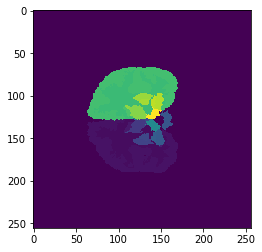

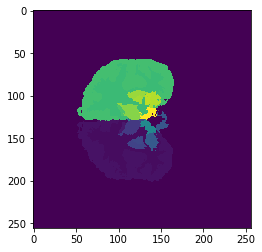

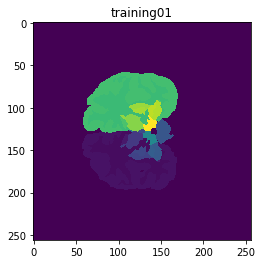

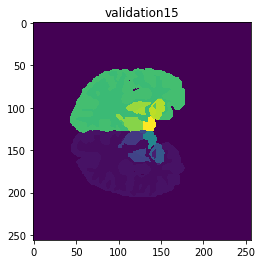

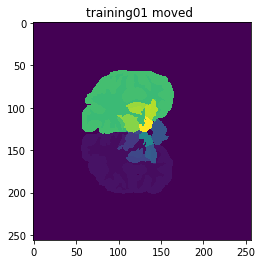

In [8]:
#4 compute most frequent training label
from collections import Counter

def fusion(img_v_seg,img_moved_t01v_seg,img_moved_t02v_seg,img_moved_t03v_seg,
           img_moved_t04v_seg,img_moved_t05v_seg,img_moved_t06v_seg):
    img_v_autoseg=np.zeros([img_v_seg.shape[0],img_v_seg.shape[1]])
    for i in range (img_v_seg.shape[0]):
        for j in range (img_v_seg.shape[1]):
            result=[]
            result.append(img_moved_t01v_seg[i,j])
            result.append(img_moved_t02v_seg[i,j])
            result.append(img_moved_t03v_seg[i,j])
            result.append(img_moved_t04v_seg[i,j])
            result.append(img_moved_t05v_seg[i,j])
            result.append(img_moved_t06v_seg[i,j])
            result_counts = Counter(result)
            top = result_counts.most_common(1)
            img_v_autoseg[i,j]=top[0][0]
    return img_v_autoseg

img_v07_autoseg=fusion(img_v07_seg,img_moved_t01v07_seg,img_moved_t02v07_seg,img_moved_t03v07_seg,
img_moved_t04v07_seg,img_moved_t05v07_seg,img_moved_t06v07_seg)
img_v15_autoseg=fusion(img_v15_seg,img_moved_t01v15_seg,img_moved_t02v15_seg,img_moved_t03v15_seg,
img_moved_t04v15_seg,img_moved_t05v15_seg,img_moved_t06v15_seg)        

        
fig = plt.figure()
plt.imshow(img_v07_autoseg)
fig = plt.figure()
plt.imshow(img_v15_autoseg)

fig = plt.figure()
plt.imshow(img_t01_seg)
plt.title('training01')
fig = plt.figure()
plt.imshow(img_v15_seg) 
plt.title('validation15')
fig = plt.figure()
plt.imshow(img_moved_t01v15_seg)
plt.title('training01 moved ')

In [9]:
def fusion2(img_v_seg,img_t01v_seg,img_t02v_seg,img_t03v_seg,
           img_t04v_seg,img_t05v_seg,img_t06v_seg):
    img_v_autoseg=np.zeros([img_v_seg.shape[0],img_v_seg.shape[1]])
    img1_6=np.array([img_t01v_seg,img_t02v_seg,img_t03v_seg,
           img_t04v_seg,img_t05v_seg,img_t06v_seg])
    for i in range (5,img_v_seg.shape[0]-5):
        for j in range (5,img_v_seg.shape[1]-5):
            MSE=np.zeros([6,])
            for m in range(i,i+1):
                for n in range(j,j+1):
                    MSE[0]+=(img_v_seg[m,n] -img_t01v_seg[m,n])**2
                    MSE[1]+=(img_v_seg[m,n] -img_t02v_seg[m,n])**2
                    MSE[2]+=(img_v_seg[m,n] -img_t03v_seg[m,n])**2
                    MSE[3]+=(img_v_seg[m,n] -img_t04v_seg[m,n])**2
                    MSE[4]+=(img_v_seg[m,n] -img_t05v_seg[m,n])**2
                    MSE[5]+=(img_v_seg[m,n] -img_t06v_seg[m,n])**2
            MSE_min=np.argmin(MSE)
            img_v_autoseg[i,j]=img1_6[MSE_min,i,j] 
    return img_v_autoseg
img_v07_autoseg=fusion2(img_v07_seg,img_moved_t01v07_seg,img_moved_t02v07_seg,img_moved_t03v07_seg,
img_moved_t04v07_seg,img_moved_t05v07_seg,img_moved_t06v07_seg)
img_v15_autoseg=fusion2(img_v15_seg,img_moved_t01v15_seg,img_moved_t02v15_seg,img_moved_t03v15_seg,
img_moved_t04v15_seg,img_moved_t05v15_seg,img_moved_t06v15_seg) 

In [10]:
#5 6 Jaccard overlap index
def Jaccard(r,img_auto,img_man): #r =ROI
    inter=[]
    union=[]
    for i in range (img_man.shape[0]):
        for j in range (img_man.shape[1]):
            if img_auto[i,j]==r and img_man[i,j]==r:
                inter.append((i,j))
            if img_auto[i,j]==r or img_man[i,j]==r:
                union.append((i,j))
    ratio=len(inter)/len(union)
    return ratio

img_v07_autoseg=fusion(img_v07_seg,img_moved_t01v07_seg,img_moved_t02v07_seg,img_moved_t03v07_seg,
img_moved_t04v07_seg,img_moved_t05v07_seg,img_moved_t06v07_seg)
img_v15_autoseg=fusion(img_v15_seg,img_moved_t01v15_seg,img_moved_t02v15_seg,img_moved_t03v15_seg,
img_moved_t04v15_seg,img_moved_t05v15_seg,img_moved_t06v15_seg)   

J_v07_2=Jaccard(2,img_v07_autoseg,img_v07_seg)
J_v07_3=Jaccard(3,img_v07_autoseg,img_v07_seg)
J_v07_41=Jaccard(41,img_v07_autoseg,img_v07_seg)
J_v07_42=Jaccard(42,img_v07_autoseg,img_v07_seg)

J_v15_2=Jaccard(2,img_v15_autoseg,img_v15_seg)
J_v15_3=Jaccard(3,img_v15_autoseg,img_v15_seg)
J_v15_41=Jaccard(41,img_v15_autoseg,img_v15_seg)
J_v15_42=Jaccard(42,img_v15_autoseg,img_v15_seg)



from tabulate import tabulate
table07 = [["left Cerebral-White-Matter",J_v07_2],["Left Cerebral-Cortex",J_v07_3],["Right Cerebral-White-Matter",J_v07_41],["Right Cerebral-Cortex",J_v07_42]]
print('validation_07:')
print(tabulate(table07))
table15 = [["left Cerebral-White-Matter",J_v15_2],["Left Cerebral-Cortex",J_v15_3],["Right Cerebral-White-Matter",J_v15_41],["Right Cerebral-Cortex",J_v15_42]]
print('validation_15:')
print(tabulate(table15))



validation_07:
---------------------------  --------
left Cerebral-White-Matter   0.557143
Left Cerebral-Cortex         0.611327
Right Cerebral-White-Matter  0.585977
Right Cerebral-Cortex        0.637919
---------------------------  --------
validation_15:
---------------------------  --------
left Cerebral-White-Matter   0.488901
Left Cerebral-Cortex         0.363963
Right Cerebral-White-Matter  0.485624
Right Cerebral-Cortex        0.39119
---------------------------  --------


In [8]:
path='F:\lecture document\ECE 4250 signal\project'
#import training, validation
imgsource_t01 = nib.load(r(path+'\Training\IBSR_01\images\analyze\IBSR_01_ana.img'))
    

NameError: name 'nib' is not defined